In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\adity\AppData\Local\Temp\ipykernel_12504\4228583543.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('data/heart_disease.csv')
df.head()
#EDA - Exploratory Data Analysis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# profile = ProfileReport(df)
# profile.to_file('Report_Heart_Disease.html')

In [4]:
df.shape

(303, 14)

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

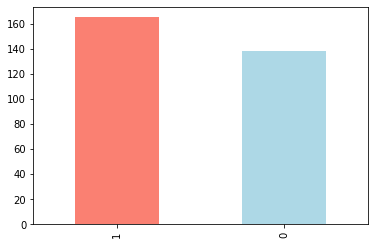

In [7]:
df.target.value_counts().plot(kind='bar',color=["salmon","lightblue"])

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='target'>

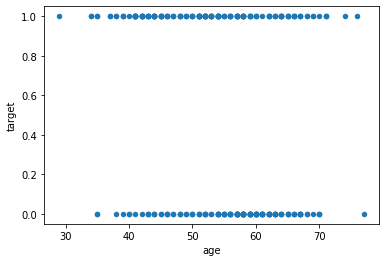

In [9]:
df.plot('age','target',kind='scatter')

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


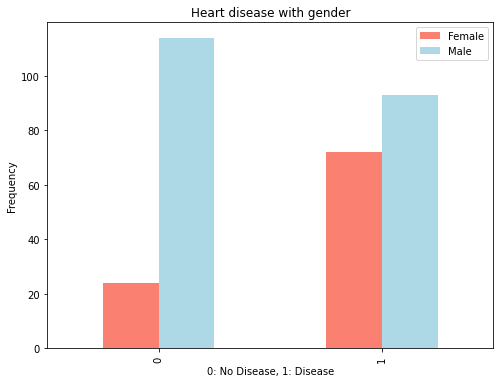

In [11]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=["salmon","lightblue"],figsize=(8,6))
plt.title("Heart disease with gender")
plt.xlabel("0: No Disease, 1: Disease")
plt.ylabel("Frequency")
plt.legend(["Female","Male"])

### Age vs thalch (Max Heart rate)

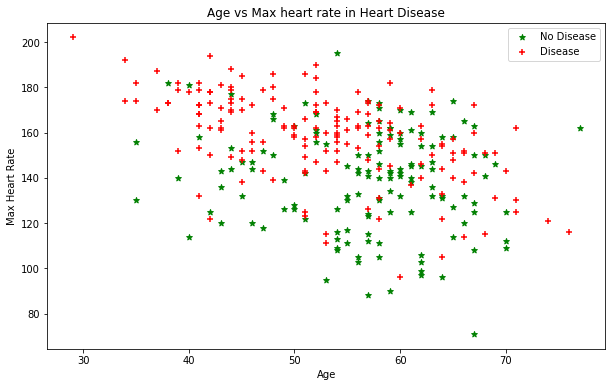

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='green',marker='*')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Age vs Max heart rate in Heart Disease")
plt.scatter(df.age[df.target==1],df["thalach"][df.target==1],color='red',marker='+')
plt.legend(["No Disease","Disease"]);

The younger someone is, the higher their max heart rate and the older someone is, the more red dots there are. But this may be because there are more dots all together on the right side of the graph.

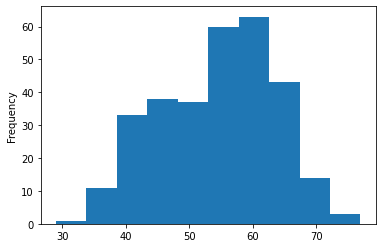

In [13]:
df.age.plot(kind='hist');

### Chest pain vs heart disease

In [14]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [15]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

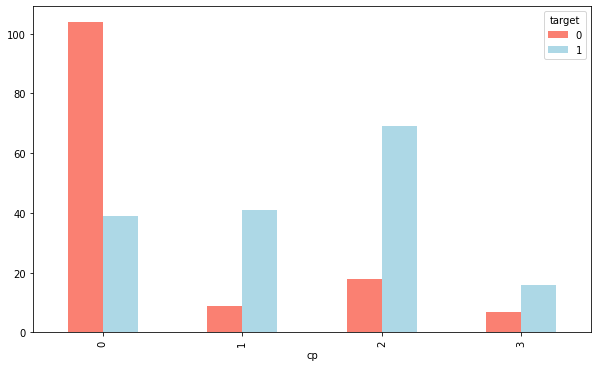

In [16]:
pd.crosstab(df["cp"],df["target"]).plot(kind='bar',color=["salmon","lightblue"],figsize=(10,6));

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='chol', ylabel='target'>

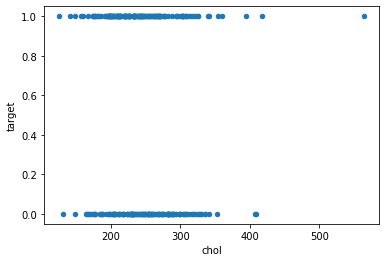

In [18]:
df.plot('chol','target',kind='scatter')

In [19]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


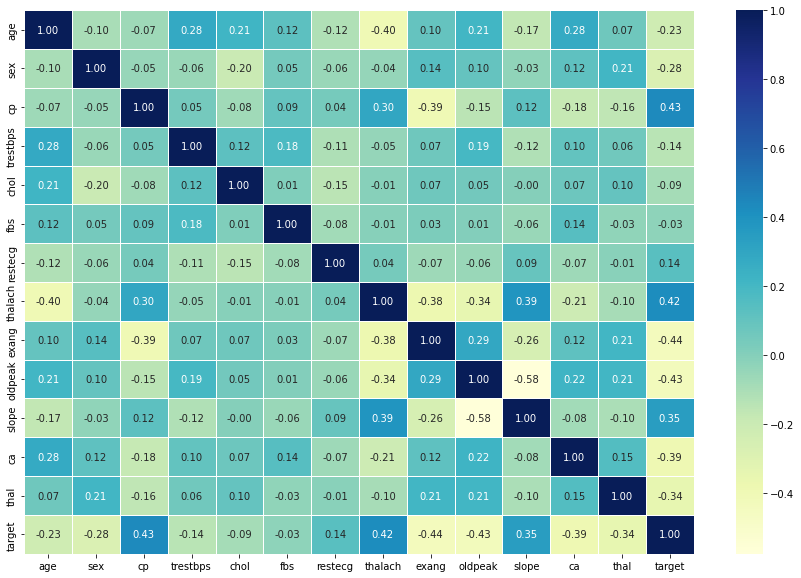

In [20]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=.5,
                 fmt=".2f",
                 cmap="YlGnBu");


In [21]:
X = df.drop('target',axis=1)
y = df["target"]

In [22]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


### Modelling

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
models = {
    'LogisticRegression':LogisticRegression(),
    'SVM' : SVC(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [26]:
np.random.seed(42)
def get_best_model(models,X_train,X_test,y_train,y_test):
    model_score={}
    for model_name,model in models.items():
        clf = model.fit(X_train,y_train)
        score = clf.score(X_test,y_test)
        model_score[model_name] = score
    return model_score

In [27]:
score_dict = get_best_model(models,X_train,X_test,y_train,y_test)
score_dict

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'SVM': 0.7049180327868853,
 'RandomForestClassifier': 0.8360655737704918,
 'KNN': 0.6885245901639344}

#### Till now  we have build baseline  model

### Model Comparison

<AxesSubplot:>

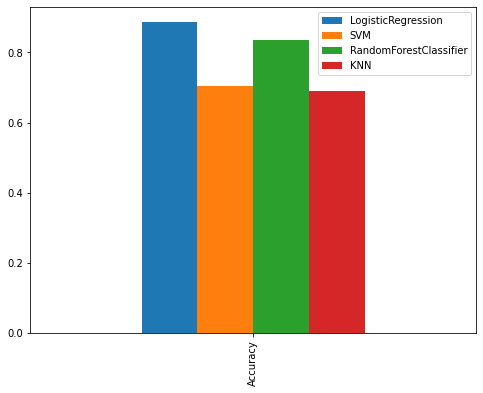

In [92]:
model_compare = pd.DataFrame(score_dict,index=["Accuracy"])
model_compare.plot(kind='bar',figsize=(8,6))

<AxesSubplot:>

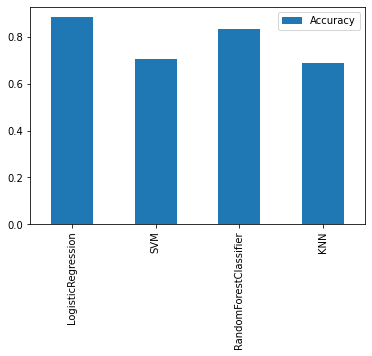

In [29]:
model_compare.T.plot(kind='bar')

In [30]:
train_scores=[]
test_scores=[]
knn=KNeighborsClassifier()
for i in range(1,21):
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

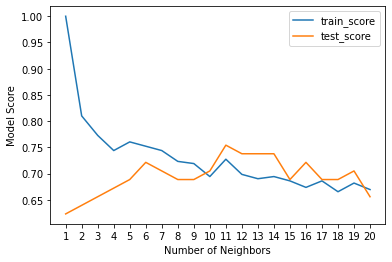

In [33]:
plt.plot(range(1,21),train_scores,label="train_score")
plt.plot(range(1,21),test_scores,label='test_score')
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
# to bring range of 1's
plt.xticks(np.arange(1,21,1));

* n_neighbors value 11 yields the best score

### Tuning the Hyperparameters

* We will use RandomizedsearchCV and GridSearhCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [35]:
log_reg_params ={
    'C' : np.logspace(-4,4,20),
    'solver': ['liblinear']
}
random_forest_params = {
    'n_estimators' : range(10,150,10),
    'min_samples_split': [2,4,6],
    'min_samples_leaf':[1,3,6]
}

In [36]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_params,
                                n_iter=10,
                                cv=5,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [38]:
rs_log_reg.score(X_test,y_test)

0.8688524590163934

In [39]:
rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=random_forest_params,
                               verbose=True,
                               cv=5,n_iter=20
                              )
rs_rf_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'min_samples_leaf': [1, 3, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': range(10, 150, 10)},
                   verbose=True)

In [40]:
rs_rf_clf.best_params_

{'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 6}

In [41]:
rs_rf_clf.score(X_test,y_test)

0.8852459016393442

In [42]:
rs_rf_clf.best_score_

0.8264455782312925

In [43]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_params,
                          cv=5,
                          verbose=2)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [44]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [45]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [46]:
gs_random_forest = GridSearchCV(RandomForestClassifier(),
                                param_grid=random_forest_params,
                                cv=5,
                               verbose=True)

gs_random_forest.fit(X_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': range(10, 150, 10)},
             verbose=True)

In [47]:
gs_random_forest.best_params_

{'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 10}

In [48]:
gs_random_forest.score(X_test,y_test)

0.8360655737704918

Selecting gs_log _reg that is logistic regression model with params: 'C': 0.23357214690901212, 'solver': 'liblinear'

## Model Evaluation
* ROC curve 
* Confusion matrix
* Classification report
* Precisoin
* recall
* F-1 score

In [49]:
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [50]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
y_prob = gs_log_reg.predict_proba(X_test)
y_prob

array([[0.87279283, 0.12720717],
       [0.24438107, 0.75561893],
       [0.18194454, 0.81805546],
       [0.9491368 , 0.0508632 ],
       [0.10873323, 0.89126677],
       [0.12414504, 0.87585496],
       [0.39656898, 0.60343102],
       [0.99608743, 0.00391257],
       [0.98761471, 0.01238529],
       [0.44643127, 0.55356873],
       [0.27756785, 0.72243215],
       [0.88637474, 0.11362526],
       [0.10926508, 0.89073492],
       [0.94497547, 0.05502453],
       [0.03000754, 0.96999246],
       [0.06644785, 0.93355215],
       [0.03351399, 0.96648601],
       [0.90955656, 0.09044344],
       [0.98401135, 0.01598865],
       [0.97564618, 0.02435382],
       [0.28456165, 0.71543835],
       [0.97536917, 0.02463083],
       [0.85819712, 0.14180288],
       [0.27256229, 0.72743771],
       [0.11271507, 0.88728493],
       [0.30593388, 0.69406612],
       [0.15242929, 0.84757071],
       [0.31176193, 0.68823807],
       [0.98336957, 0.01663043],
       [0.11750472, 0.88249528],
       [0.

In [52]:
y_prob_positive = y_prob[:,1]

In [53]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob_positive)

In [54]:
fpr

array([0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.20689655,
       0.20689655, 0.31034483, 0.31034483, 0.4137931 , 0.4137931 ,
       1.        ])

Text(0, 0.5, 'True Positive Rate')

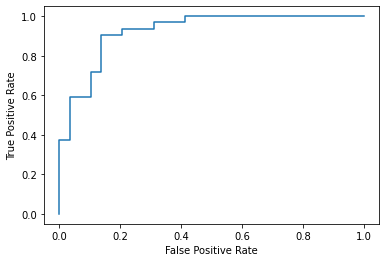

In [55]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [56]:
roc_auc_score(y_test,y_prob_positive)

0.9245689655172414

In [57]:
cm = confusion_matrix(y_test,y_preds)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

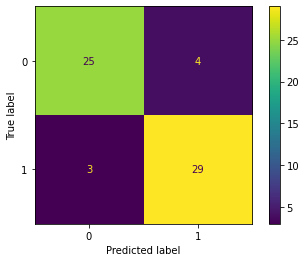

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

In [60]:
clf_report = classification_report(y_test,y_preds)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [63]:
ls_clf = LogisticRegression(C=0.2334,solver='liblinear')

In [64]:
cv_log_acc = cross_val_score(ls_clf,X,y,cv=5,scoring='accuracy')

In [65]:
cv_log_pre = cross_val_score(ls_clf,X,y,cv=5,scoring='precision')

In [67]:
cv_log_recall = cross_val_score(ls_clf,X,y,cv=5,scoring='recall')

In [68]:
cv_log_f1 = cross_val_score(ls_clf,X,y,cv=5,scoring='f1')

In [69]:
cv_log_acc,cv_log_f1,cv_log_pre,cv_log_recall

(array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ]),
 array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055]),
 array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ]),
 array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788]))

In [86]:
cv_acc = np.mean(cv_log_acc)
cv_pre = np.mean(cv_log_pre)
cv_recall = np.mean(cv_log_recall)
cv_f1 = np.mean(cv_log_f1)

In [88]:
clf_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Recall": cv_recall,
                           "Precision":cv_pre,
                           "F-1":cv_f1},
                            index=[0])
clf_metrics

,Accuracy,Recall,Precision,F-1
0,0.847978,0.927273,0.821587,0.87054


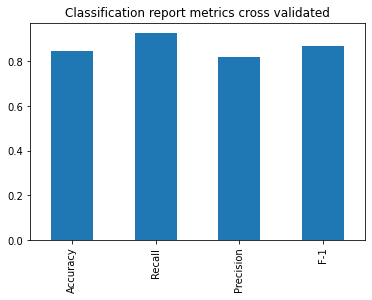

In [91]:
clf_metrics.T.plot.bar(title="Classification report metrics cross validated",legend=False);